<a href="https://colab.research.google.com/github/muqadas007-jerry/Titanic-Dataset-Analysis/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Task 1 Titanic-Dataset.csv')

In [19]:
# Display the first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
## Data Cleaning:
##Handle Missing Values:
##Identify missing values:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
##Common columns with missing values are 'Age', 'Cabin', and 'Embarked'.

##For 'Age', you can impute missing values with the median age:

df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-21-0b4a2c23277d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [22]:
#For 'Embarked', impute with the mode (most frequent value):

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-22-d74bf1507600>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [23]:
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True) # Setting inplace=True
else:
    print("Column 'Cabin' not found in DataFrame.")

In [24]:
#Remove Duplicates:

#Check for and remove duplicate rows:


df.drop_duplicates(inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
#Identifying Outliers'
df.drop_duplicates(inplace=True)

In [15]:
#Remove Extreme OutLiers
df = df[df['Fare'] < df['Fare'].quantile(0.99)]

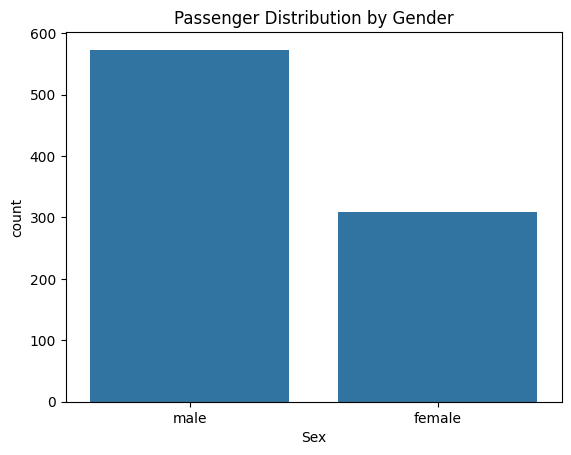

In [17]:
import seaborn as sns # Import the seaborn library and give it the alias 'sns'
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and give it the alias 'plt'


#Bar Chart for Categorical Variables

sns.countplot(x='Sex', data=df) # Use the 'sns' alias to access the countplot function
plt.title('Passenger Distribution by Gender') # Use the 'plt' alias to access the title function
plt.show() # Use the 'plt' alias to access the show function

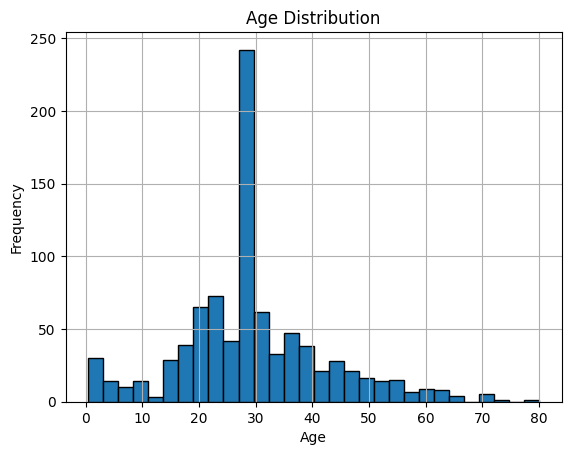

In [25]:
#Histogram for Numeric Distributions

df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

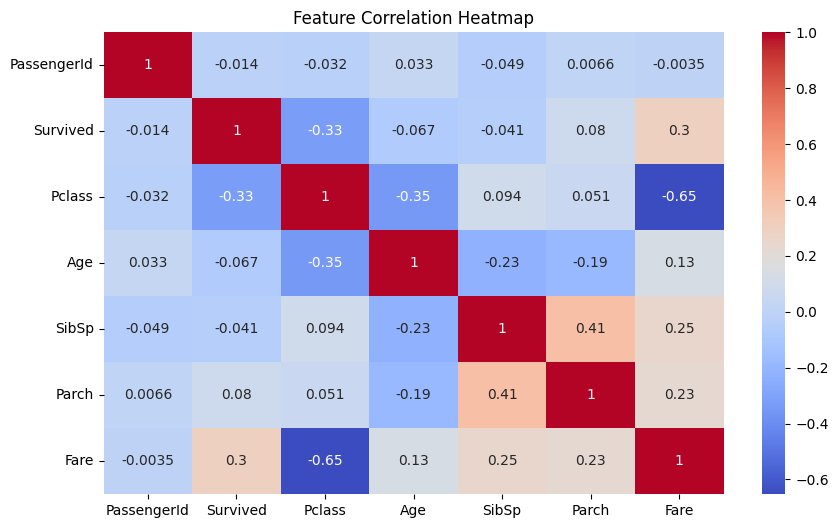

In [ ]:
##Correlation Heatmap for Numeric Features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import the NumPy library and assign it the alias 'np'

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numeric columns for correlation
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
##Summary of Insights

##Gender Distribution: More male passengers than female.

##Age Distribution: Most passengers are between 20-40 years old.

##Fare Outliers: Removed extreme values above the 99th percentile.

##Correlation: Survival is correlated with fare and class.